In [63]:
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Resize and normalize
def preprocess_image(image, target_size=(224, 224)):
    image = cv2.resize(image, target_size)
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image

# Augmentation setup
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [64]:
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Resize and normalize
def preprocess_image(image, target_size=(224, 224)):
    image = cv2.resize(image, target_size)
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image

# Augmentation setup
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [65]:
from tensorflow.keras import layers, models

def build_discriminator(input_shape=(224, 224, 3)):
    model = models.Sequential()

    model.add(layers.Conv2D(64, (3, 3), strides=2, padding='same', input_shape=input_shape))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3, 3), strides=2, padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(256, (3, 3), strides=2, padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))  # Output real/fake
    return model


In [66]:
discriminator = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


c:\Users\ummef\deepfake_detection\deepfake_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ummef\deepfake_detection\deepfake_env\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define training and validation directories
train_dir = r"C:\Users\ummef\Downloads\dataset\train"
valid_dir = r"C:\Users\ummef\Downloads\dataset\validation"

# Use ImageDataGenerator for loading and augmentation
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=30, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='binary')
valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(224, 224), batch_size=32, class_mode='binary')

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_discriminator.h5', save_best_only=True, monitor='val_loss', mode='min')

history = discriminator.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // 32,
    epochs=20,
    callbacks=[early_stop, checkpoint]
)


Found 2549 images belonging to 2 classes.
Found 568 images belonging to 2 classes.
Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6564 - loss: 0.6390

79/79 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.6567 - loss: 0.6386 - val_accuracy: 0.8511 - val_loss: 0.4124
Epoch 2/20
 1/79 ━━━━━━━━━━━━━━━━━━━━ 1:25 1s/step - accuracy: 0.8125 - loss: 0.4499

c:\Users\ummef\deepfake_detection\deepfake_env\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.8125 - loss: 0.4499 - val_accuracy: 0.8125 - val_loss: 0.4665
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7515 - loss: 0.5212

79/79 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.7514 - loss: 0.5212 - val_accuracy: 0.8033 - val_loss: 0.4002
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.7188 - loss: 0.4527 - val_accuracy: 0.7996 - val_loss: 0.4447
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7657 - loss: 0.4840

79/79 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.7658 - loss: 0.4839 - val_accuracy: 0.8511 - val_loss: 0.3881
Epoch 6/20
 1/79 ━━━━━━━━━━━━━━━━━━━━ 1:22 1s/step - accuracy: 0.7812 - loss: 0.4730

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7812 - loss: 0.4730 - val_accuracy: 0.8456 - val_loss: 0.3874
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.7881 - loss: 0.4573 - val_accuracy: 0.8254 - val_loss: 0.4365
Epoch 8/20
 1/79 ━━━━━━━━━━━━━━━━━━━━ 1:33 1s/step - accuracy: 0.7500 - loss: 0.5228

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7500 - loss: 0.5228 - val_accuracy: 0.8585 - val_loss: 0.3700
Epoch 9/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.7776 - loss: 0.4734 - val_accuracy: 0.8309 - val_loss: 0.3759
Epoch 10/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8438 - loss: 0.3671 - val_accuracy: 0.8309 - val_loss: 0.4002
Epoch 11/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7663 - loss: 0.4800

79/79 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.7663 - loss: 0.4801 - val_accuracy: 0.8364 - val_loss: 0.3596
Epoch 12/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.7812 - loss: 0.4922 - val_accuracy: 0.8254 - val_loss: 0.3892
Epoch 13/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.7977 - loss: 0.4441 - val_accuracy: 0.8382 - val_loss: 0.3747
Epoch 14/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.8438 - loss: 0.3941 - val_accuracy: 0.8438 - val_loss: 0.3638
Epoch 15/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.8110 - loss: 0.4041 - val_accuracy: 0.8603 - val_loss: 0.3603
Epoch 16/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.8125 - loss: 0.3601 - val_accuracy: 0.8640 - val_loss: 0.3598


In [70]:
test_dir = r"C:\Users\ummef\Downloads\dataset\test"
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='binary')

test_loss, test_acc = discriminator.evaluate(test_generator, steps=test_generator.samples // 32)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Found 433 images belonging to 2 classes.
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 390ms/step - accuracy: 0.7651 - loss: 0.5472
Test Loss: 0.5157
Test Accuracy: 0.7644


In [92]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Function to preprocess the image
def preprocess_image(image, target_size=(224, 224)):
    img = cv2.resize(image, target_size)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# Load the saved model
model = load_model('best_discriminator.h5')

# Open video stream
video_path = r"C:\Users\ummef\OneDrive\Documents\rashmika.mp4"  # Replace with the path to your video
cap = cv2.VideoCapture(video_path)

# Variables to track predictions
fake_count = 0
real_count = 0
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the frame
    image = preprocess_image(frame)

    # Make prediction with verbose=0 to suppress output
    prediction = model.predict(image, verbose=0)

    # Count predictions
    if prediction[0] > 0.7:
        fake_count += 1
        label = "Fake"
        color = (0, 0, 255)  # Red color for Fake
    else:
        real_count += 1
        label = "Real"
        color = (0, 255, 0)  # Green color for Real

    # Add the prediction label to the frame
    cv2.putText(frame, f"Prediction: {label}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
    
    # Display the frame with prediction label
    cv2.imshow('Deepfake Detection', frame)

    # Press 'q' to quit the video display
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    frame_count += 1

# Release the video capture object and close windows
cap.release()
cv2.destroyAllWindows()

# Final prediction based on majority voting
if fake_count > real_count:
    print("The video is fake.")
else:
    print("The video is real.")


The video is fake.


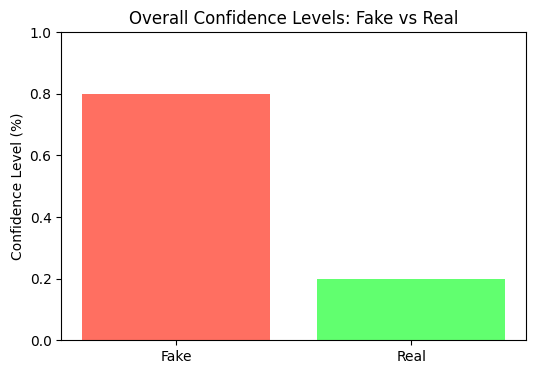

The video is fake.


In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Function to preprocess the image
def preprocess_image(image, target_size=(224, 224)):
    img = cv2.resize(image, target_size)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# Load the saved model
model = load_model('best_discriminator.h5')

# Open video stream
video_path = r"C:\Users\ummef\OneDrive\Documents\rashmika.mp4"  # Replace with the path to your video
cap = cv2.VideoCapture(video_path)

# Variables to track predictions and confidence
fake_confidences = []
real_confidences = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the frame
    image = preprocess_image(frame)

    # Make prediction with verbose=0 to suppress output
    prediction = model.predict(image, verbose=0)

    # Extract the scalar confidence value
    fake_confidence = prediction[0][0]
    real_confidence = 1 - fake_confidence

    # Store confidence values
    fake_confidences.append(fake_confidence)
    real_confidences.append(real_confidence)

# Release the video capture object
cap.release()

# Calculate overall confidence level
mean_fake_confidence = np.mean(fake_confidences)
mean_real_confidence = np.mean(real_confidences)

# Plot the confidence bar chart
plt.figure(figsize=(6, 4))
plt.bar(['Fake', 'Real'], [mean_fake_confidence, mean_real_confidence], color=['#ff6f61', '#61ff6f'])
plt.title('Overall Confidence Levels: Fake vs Real')
plt.ylabel('Confidence Level (%)')
plt.ylim(0, 1)
plt.show()

# Final prediction based on majority voting
if mean_fake_confidence > mean_real_confidence:
    print("The video is fake.")
else:
    print("The video is real.")
